In [1]:
import pathlib

import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
interaction_folder = pathlib.Path("../../data/raw/kchip/interactions")

In [4]:
# labels extracted from heatmap image
row_labels = [
    "PAl", "PAg2", "PAg1", "PAg3", "LA", "EL", "RP2", "RP1", "SF", "BI",
    "KA", "CF", "EC", "EA", "PK", "PR1", "PAr", "PR2", "PH", "PP"
]
# ignore the diluted media conditions
column_labels = [
    "Glycerol", "Glutamine", "Cellobiose", "Rhamnose", "Maltose", "Mannose", "GlcNAc", "Trehalose",
    "Glucose", "Mix", "Pyruvate", "Alanine", "Fructose", "Galactose", "Ribose", "Xylose", "Mannitol", "L-Arabinose", "Sorbitol",
    "Lactose", "Sucrose",  "Raffinose", "Uridine", "Arabinogalactan", "Melezitose", "Water", "D-Arabinose", "Serine", "Isoleucine", "Arginine",
    "Acetate", "Citrate", "Fumarate", "Succinate", "Proline"
]

In [5]:
interaction_file = interaction_folder / "interactions.csv"
raw_interaction_df = pd.read_csv(interaction_file)
raw_interaction_df

,Bug 1,Bug 2,Carbon,1 on 2: Effect,1 on 2: 25th Percentile,1 on 2: 75th Percentile,1 on 2: Replicates,2 on 1: Effect,2 on 1: 25th Percentile,2 on 1: 75th Percentile,2 on 1: Replicates,Class,Type,Strength
0,PAl,PAl,ArabinoseD,0.000000,0.000000,0.000000,5,0.0,0.0,0.000000,5,Neutralism,NaN,0.000000
1,PAl,PAg2,ArabinoseD,0.392474,-0.063408,0.945052,9,0.0,0.0,0.000000,6,Neutralism,45.0,0.392474
2,PAl,PAg1,ArabinoseD,NaN,NaN,NaN,1,0.0,0.0,0.120721,6,Inconclusive,NaN,NaN
3,PAl,PAg3,ArabinoseD,0.000000,0.000000,0.000000,6,0.0,0.0,0.000000,8,Neutralism,NaN,0.000000
4,PAl,LA,ArabinoseD,0.806290,0.384895,1.164122,6,0.0,0.0,0.000000,5,Commensalism,45.0,0.806290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,PP,PR1,Water,0.000000,0.000000,0.000000,5,0.0,0.0,0.000000,16,Neutralism,NaN,0.000000
15996,PP,PAr,Water,0.000000,0.000000,0.000000,10,0.0,0.0,0.000000,8,Neutralism,NaN,0.000000
15997,PP,PR2,Water,0.000000,0.000000,0.000000,10,0.0,0.0,0.000000,12,Neutralism,NaN,0.000000
15998,PP,PH,Water,0.000000,0.000000,0.000000,13,0.0,0.0,0.000000,8,Neutralism,NaN,0.000000


In [6]:
interaction_df = raw_interaction_df.copy()
# Rename Carbon sources (ArabinoseD -> D-Arabinose)
interaction_df["Carbon"] = raw_interaction_df["Carbon"].replace({"ArabinoseD": "D-Arabinose", "ArabinoseL": "L-Arabinose"})
interaction_df["Bug 1"] = interaction_df["Bug 1"].replace({"SF1": "SF"})
interaction_df["Bug 2"] = interaction_df["Bug 2"].replace({"SF2": "SF"})
# Drop rows and columns that are not in the labels
interaction_df = interaction_df[interaction_df["Carbon"].isin(column_labels)]
interaction_df = interaction_df[interaction_df["Bug 1"].isin(row_labels)]
interaction_df = interaction_df[interaction_df["Bug 2"].isin(row_labels)]
interaction_df

,Bug 1,Bug 2,Carbon,1 on 2: Effect,1 on 2: 25th Percentile,1 on 2: 75th Percentile,1 on 2: Replicates,2 on 1: Effect,2 on 1: 25th Percentile,2 on 1: 75th Percentile,2 on 1: Replicates,Class,Type,Strength
0,PAl,PAl,D-Arabinose,0.000000,0.000000,0.000000,5,0.0,0.0,0.000000,5,Neutralism,NaN,0.000000
1,PAl,PAg2,D-Arabinose,0.392474,-0.063408,0.945052,9,0.0,0.0,0.000000,6,Neutralism,45.0,0.392474
2,PAl,PAg1,D-Arabinose,NaN,NaN,NaN,1,0.0,0.0,0.120721,6,Inconclusive,NaN,NaN
3,PAl,PAg3,D-Arabinose,0.000000,0.000000,0.000000,6,0.0,0.0,0.000000,8,Neutralism,NaN,0.000000
4,PAl,LA,D-Arabinose,0.806290,0.384895,1.164122,6,0.0,0.0,0.000000,5,Commensalism,45.0,0.806290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,PP,PR1,Water,0.000000,0.000000,0.000000,5,0.0,0.0,0.000000,16,Neutralism,NaN,0.000000
15996,PP,PAr,Water,0.000000,0.000000,0.000000,10,0.0,0.0,0.000000,8,Neutralism,NaN,0.000000
15997,PP,PR2,Water,0.000000,0.000000,0.000000,10,0.0,0.0,0.000000,12,Neutralism,NaN,0.000000
15998,PP,PH,Water,0.000000,0.000000,0.000000,13,0.0,0.0,0.000000,8,Neutralism,NaN,0.000000


In [7]:
# TODO: Remove same bug interactions

<Axes: xlabel='Class'>

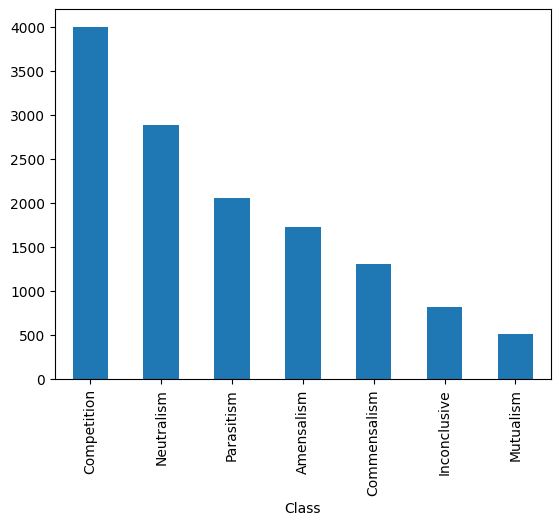

In [8]:
# get count of each Class in interaction_df
interaction_df.Class.value_counts().plot(kind='bar')

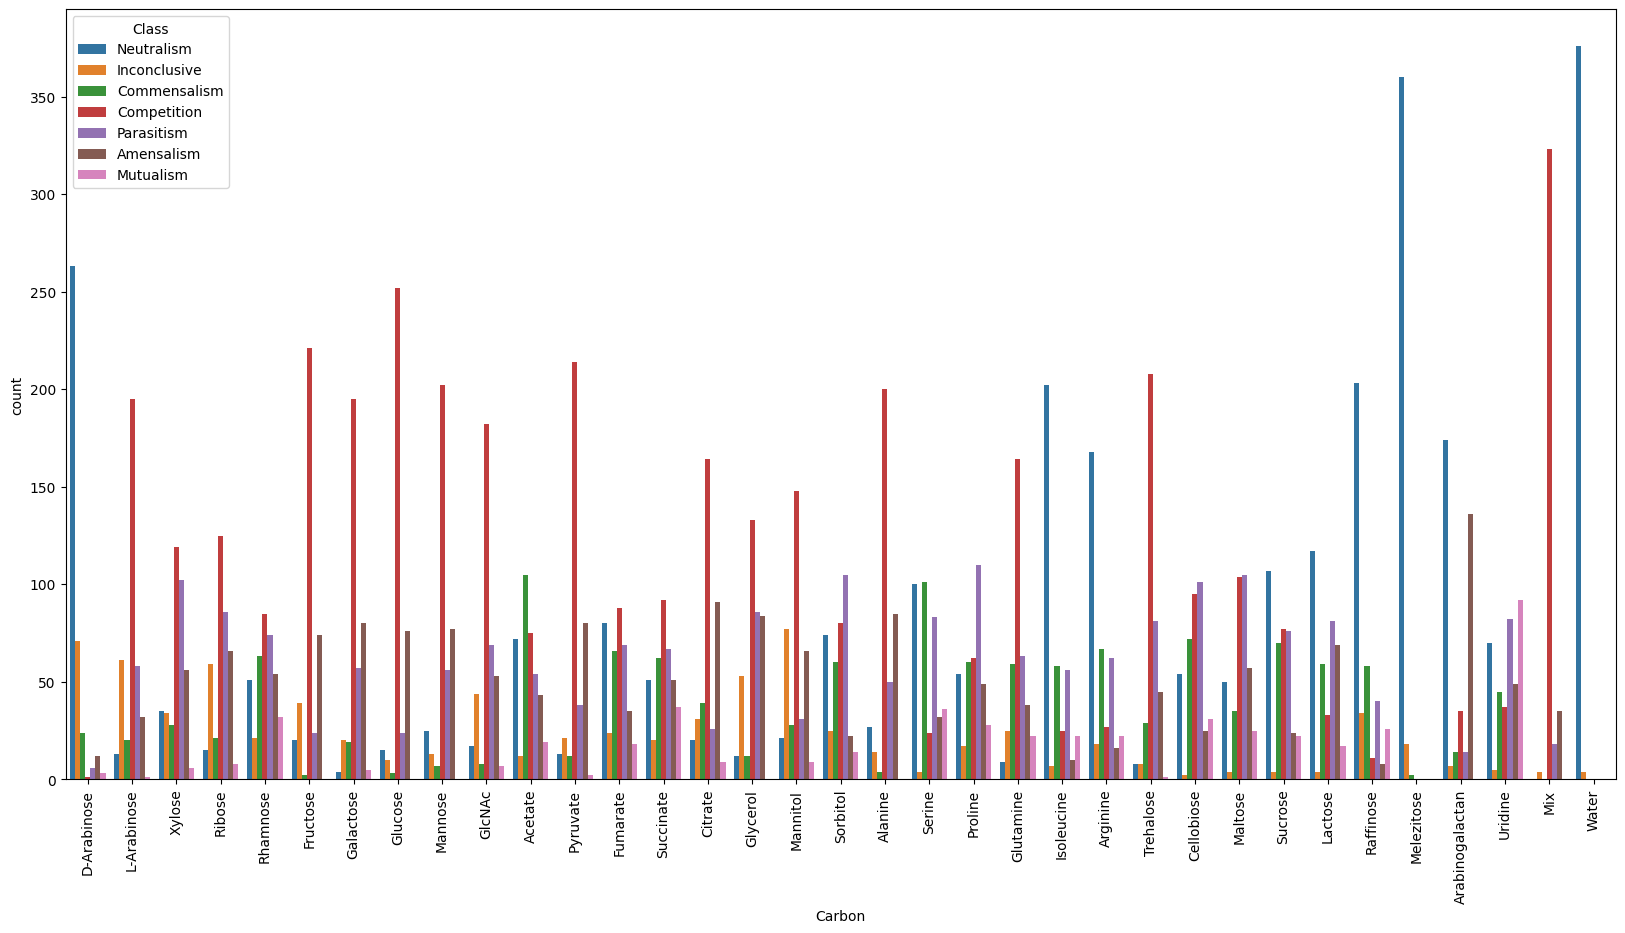

In [9]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Carbon', data=interaction_df, hue="Class")
plt.xticks(rotation=90);

<Axes: xlabel='1 on 2: Effect', ylabel='2 on 1: Effect'>

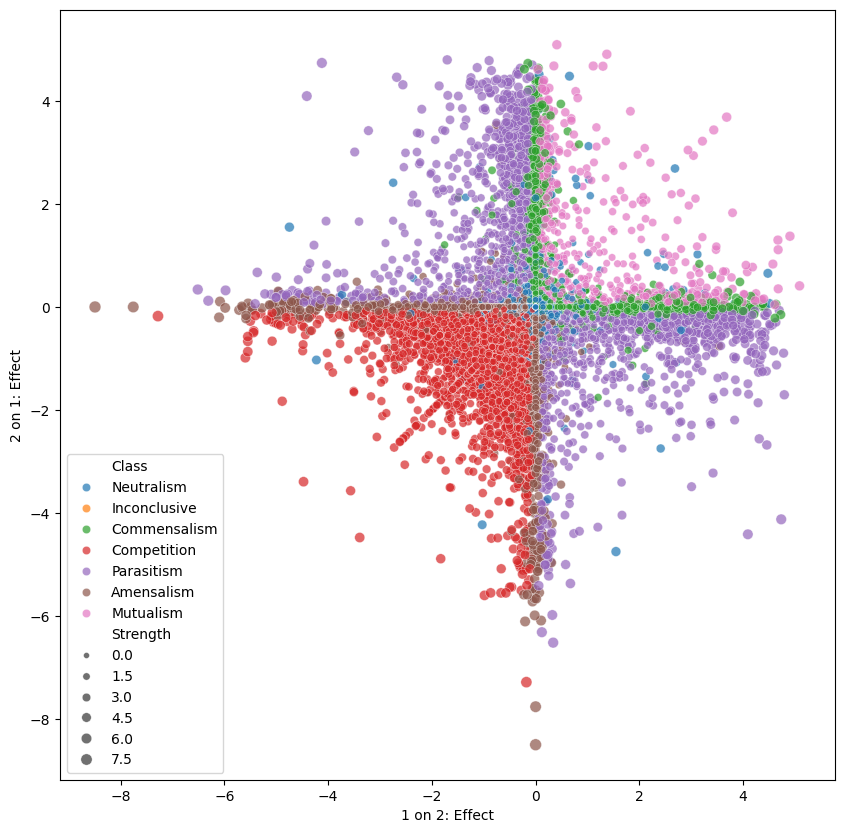

In [10]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="1 on 2: Effect", y="2 on 1: Effect", data=interaction_df, hue="Class", alpha=0.7, size="Strength")

## Machine learning

Features to use:
- experimental yield (bug 1 and bug 2)
- growth rates from FBA (bug 1 and bug 2)
- number of media conditions they both grow in (experimental & predicted)
- number of media conditions they both don't grow in (experimental & predicted)
- number of media conditions one grows in and the other doesn't (experimental & predicted)

Labels to use:
1. interaction classes (competition, mutualism, amensalism, commensalism, neutralism, parasitism, inconclusive)
2. interaction type (positive, negative, neutral)
3. interaction strength (regression)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
# read monoculture data
data_folder = pathlib.Path("../../data/processed/kchip/")
monoculture_file = data_folder / "monoculture_yield_growth.csv"

In [13]:
monoculture_df = pd.read_csv(monoculture_file)
monoculture_df

,index,carbon,exp_yield,pred_growth
0,BI,D-Arabinose,-6.838340,0.410242
1,CF,D-Arabinose,-1.925922,0.410242
2,EA,D-Arabinose,-6.523152,0.000000
3,EC,D-Arabinose,13.082301,0.000000
4,EL,D-Arabinose,4.188936,0.716811
...,...,...,...,...
695,PR1,Water,0.000000,0.000000
696,PR2,Water,0.000000,0.000000
697,RP1,Water,0.000000,0.410067
698,RP2,Water,0.000000,0.249062


In [14]:
monoculture_yield_matrix = monoculture_df.pivot(index="index", columns="carbon", values="exp_yield")
monoculture_yield_norm = monoculture_yield_matrix.apply(lambda x: x / x.max(), axis=1)
monoculture_yield_norm[monoculture_yield_norm < 0.2] = 0
monoculture_growth_matrix = monoculture_df.pivot(index="index", columns="carbon", values="pred_growth")
monoculture_growth_norm = monoculture_growth_matrix.apply(lambda x: x / x.max(), axis=1)
monoculture_growth_norm[monoculture_growth_norm < 0.1] = 0

In [15]:
interaction_df_labels = interaction_df[["Bug 1", "Bug 2", "Carbon", "Class", "2 on 1: Effect"]].rename(columns={"Bug 1": "bug1", "Bug 2": "bug2", "Carbon": "carbon", "Class": "class", "2 on 1: Effect": "effect_2on1"})
interaction_df_labels

,bug1,bug2,carbon,class,effect_2on1
0,PAl,PAl,D-Arabinose,Neutralism,0.0
1,PAl,PAg2,D-Arabinose,Neutralism,0.0
2,PAl,PAg1,D-Arabinose,Inconclusive,0.0
3,PAl,PAg3,D-Arabinose,Neutralism,0.0
4,PAl,LA,D-Arabinose,Commensalism,0.0
...,...,...,...,...,...
15995,PP,PR1,Water,Neutralism,0.0
15996,PP,PAr,Water,Neutralism,0.0
15997,PP,PR2,Water,Neutralism,0.0
15998,PP,PH,Water,Neutralism,0.0


In [16]:
feature_data = []
all_carbon_sources = set(monoculture_yield_matrix.columns)
for index, row in interaction_df_labels.iterrows():
    bug1 = row["bug1"]
    bug2 = row["bug2"]
    carbon = row["carbon"]
    bug1_yield = monoculture_yield_matrix.loc[bug1, carbon]
    bug2_yield = monoculture_yield_matrix.loc[bug2, carbon]
    bug1_bin_yield = monoculture_yield_norm.loc[bug1, carbon] > 0
    bug2_bin_yield = monoculture_yield_norm.loc[bug2, carbon] > 0
    bug1_growth = monoculture_growth_matrix.loc[bug1, carbon]
    bug2_growth = monoculture_growth_matrix.loc[bug2, carbon]
    bug1_bin_growth = monoculture_growth_norm.loc[bug1, carbon] > 0
    bug2_bin_growth = monoculture_growth_norm.loc[bug2, carbon] > 0
    bug1_yield_media = set(monoculture_yield_norm.columns[monoculture_yield_norm.loc[bug1] > 0])
    bug2_yield_media = set(monoculture_yield_norm.columns[monoculture_yield_norm.loc[bug2] > 0])
    bug1_growth_media = set(monoculture_growth_norm.columns[monoculture_growth_norm.loc[bug1] > 0])
    bug2_growth_media = set(monoculture_growth_norm.columns[monoculture_growth_norm.loc[bug2] > 0])
    # number of carbon sources in which both bugs have positive yield
    pos_yield = len(bug1_yield_media.intersection(bug2_yield_media))
    pos_growth = len(bug1_growth_media.intersection(bug2_growth_media))
    # number of carbon sources in which both bugs have zero yield
    neg_yield = len(all_carbon_sources.difference(bug1_yield_media.union(bug2_yield_media)))
    neg_growth = len(all_carbon_sources.difference(bug1_growth_media.union(bug2_growth_media)))
    # number of carbon sources in which one bug has positive yield and the other has zero yield
    bug1_adj_yield = bug1_yield_media.difference(bug2_yield_media)
    bug2_adj_yield = bug2_yield_media.difference(bug1_yield_media)
    bug1_adj_growth = bug1_growth_media.difference(bug2_growth_media)
    bug2_adj_growth = bug2_growth_media.difference(bug1_growth_media)
    feature_data.append({
        "bug1": bug1,
        "bug2": bug2,
        "carbon": carbon,
        "class": row["class"],
        "effect_2on1": row["effect_2on1"],
        "bug1_yield": bug1_yield,
        "bug1_bin_yield": bug1_bin_yield,
        "bug2_bin_yield": bug2_bin_yield,
        "bug2_yield": bug2_yield,
        "1by2_yield": np.abs(bug1_yield / bug2_yield) if bug2_yield > 0 else 100_000,
        "bug1_growth": bug1_growth,
        "bug2_growth": bug2_growth,
        "bug1_bin_growth": bug1_bin_growth,
        "bug2_bin_growth": bug2_bin_growth,
        "1by2_growth": np.abs(bug1_growth / bug2_growth) if bug2_growth > 0 else 1_000,
        "pos_yield": pos_yield,
        "neg_yield": neg_yield,
        "pos_growth": pos_growth,
        "neg_growth": neg_growth,
        "bug1_adj_yield": len(bug1_adj_yield),
        "bug2_adj_yield": len(bug2_adj_yield),
        "bug1_adj_growth": len(bug1_adj_growth),
        "bug2_adj_growth": len(bug2_adj_growth),
    })
feature_matrix = pd.DataFrame(feature_data)

In [17]:
# drop rows with NaN values in effect_2on1 column
feature_matrix = feature_matrix.dropna(subset=["effect_2on1"])
feature_matrix

,bug1,bug2,carbon,class,effect_2on1,bug1_yield,bug1_bin_yield,bug2_bin_yield,bug2_yield,1by2_yield,...,bug2_bin_growth,1by2_growth,pos_yield,neg_yield,pos_growth,neg_growth,bug1_adj_yield,bug2_adj_yield,bug1_adj_growth,bug2_adj_growth
0,PAl,PAl,D-Arabinose,Neutralism,0.0,-1.375435,False,False,-1.375435,100000.000000,...,False,1.000000,21,14,26,9,0,0,0,0
1,PAl,PAg2,D-Arabinose,Neutralism,0.0,-1.375435,False,False,126.978597,0.010832,...,False,3.666112,17,11,24,8,4,3,2,1
2,PAl,PAg1,D-Arabinose,Inconclusive,0.0,-1.375435,False,False,0.996728,1.379950,...,False,0.998757,19,10,24,8,2,4,2,1
3,PAl,PAg3,D-Arabinose,Neutralism,0.0,-1.375435,False,False,4.516501,0.304535,...,False,1000.000000,17,10,23,8,4,4,3,1
4,PAl,LA,D-Arabinose,Commensalism,0.0,-1.375435,False,False,5.215996,0.263695,...,False,3.310839,16,9,24,7,5,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13295,PP,PR1,Water,Neutralism,0.0,0.000000,False,False,0.000000,100000.000000,...,False,1000.000000,14,13,18,12,0,8,0,5
13296,PP,PAr,Water,Neutralism,0.0,0.000000,False,False,0.000000,100000.000000,...,False,1000.000000,14,14,17,11,0,7,1,6
13297,PP,PR2,Water,Neutralism,0.0,0.000000,False,False,0.000000,100000.000000,...,False,1000.000000,13,16,17,13,1,5,1,4
13298,PP,PH,Water,Neutralism,0.0,0.000000,False,False,0.000000,100000.000000,...,False,1000.000000,13,15,17,13,1,6,1,4


In [18]:
feature_matrix.columns

Index(['bug1', 'bug2', 'carbon', 'class', 'effect_2on1', 'bug1_yield',
       'bug1_bin_yield', 'bug2_bin_yield', 'bug2_yield', '1by2_yield',
       'bug1_growth', 'bug2_growth', 'bug1_bin_growth', 'bug2_bin_growth',
       '1by2_growth', 'pos_yield', 'neg_yield', 'pos_growth', 'neg_growth',
       'bug1_adj_yield', 'bug2_adj_yield', 'bug1_adj_growth',
       'bug2_adj_growth'],
      dtype='object')

In [19]:
# effect_cutoff = interaction_df["2 on 1: Effect"][interaction_df.Class == "Neutralism"].abs()

In [20]:
def get_sign(row, effect_cutoff=0.1):
    effect = row["effect_2on1"]
    if np.abs(effect) < effect_cutoff:
        return "neutral"
    elif effect > 0:
        return "positive"
    else:
        return "negative"

In [21]:
y_sign = feature_matrix.apply(get_sign, axis=1)
y_strength = feature_matrix["effect_2on1"]
y_class = feature_matrix["class"]
yield_cols = [c for c in feature_matrix.columns if "yield" in c]
X_yield = feature_matrix[yield_cols]
growth_cols = [c for c in feature_matrix.columns if "growth" in c]
X_growth = feature_matrix[growth_cols]

In [22]:
def perform_cv(X, y, scoring, ctype="classification"):
    if ctype == "classification":
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv = cross_validate(model, X, y, cv=skf, scoring=scoring)
    elif ctype == "regression":
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        cv = cross_validate(model, X, y, cv=5, scoring=scoring)
    else:
        raise ValueError("Invalid ctype")
    df = pd.DataFrame(cv)
    test_cols = [col for col in df.columns if col.startswith("test_")]
    test_df = df[test_cols].rename(columns=lambda x: x.replace("test_", ""))
    return test_df

In [23]:
def perform_classification(X, y, ctype="classification"):
    if ctype == "classification":
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif ctype == "regression":
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    else:
        raise ValueError("Invalid ctype")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_test, y_pred

In [24]:
def plot_cv(X_yield, X_growth, y, scoring, ctype="classification"):
    test_yield = perform_cv(X_yield, y, scoring, ctype)
    test_yield["label"] = "exp"
    test_growth = perform_cv(X_growth, y, scoring, ctype)
    test_growth["label"] = "pred"
    test_combined = pd.concat([test_yield, test_growth])
    plot_data = test_combined.melt(id_vars="label", var_name="metric", value_name="score")
    sns.catplot(data=plot_data, x="metric", y="score", kind="strip", aspect=2, hue="label", jitter=0.2)
    if ctype == "classification":
        plt.ylim(0, 1)

In [25]:
def plot_feature_importances(model, X, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [26]:
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    labels = np.unique(y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

### Predicting sign of interaction

Text(0.5, 0, 'Sign')

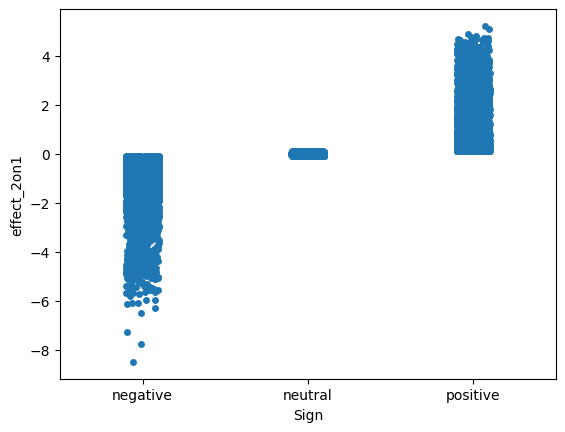

In [27]:
sns.stripplot(x=y_sign, y=feature_matrix["effect_2on1"], order=["negative", "neutral", "positive"])
plt.xlabel("Sign")

In [28]:
scoring = ["accuracy", "balanced_accuracy", "matthews_corrcoef", "precision_macro", "recall_macro", "f1_macro"]

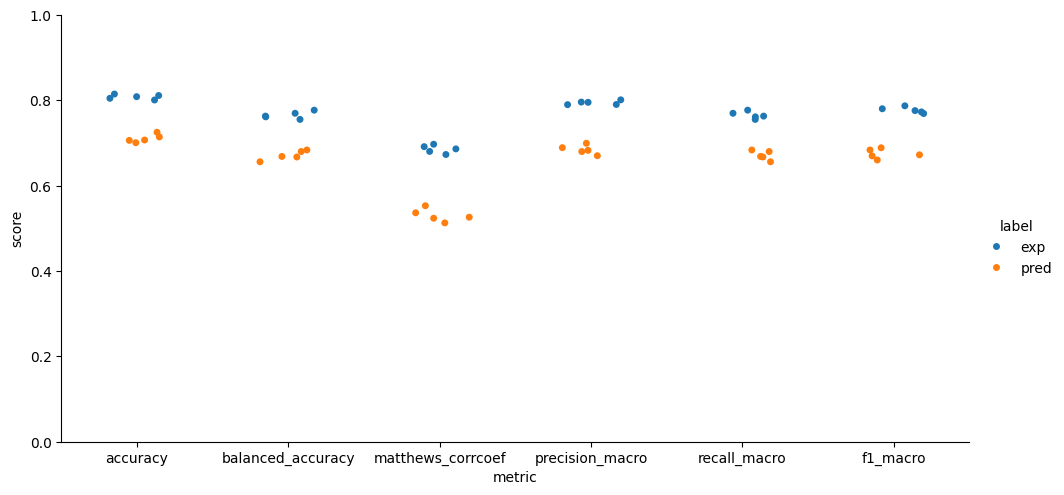

In [29]:
plot_cv(X_yield, X_growth, y_sign, scoring)

In [30]:
model_sign_yield, y_test_sign_yield, y_pred_sign_yield = perform_classification(X_yield, y_sign)
model_sign_growth, y_test_sign_growth, y_pred_sign_growth = perform_classification(X_growth, y_sign)

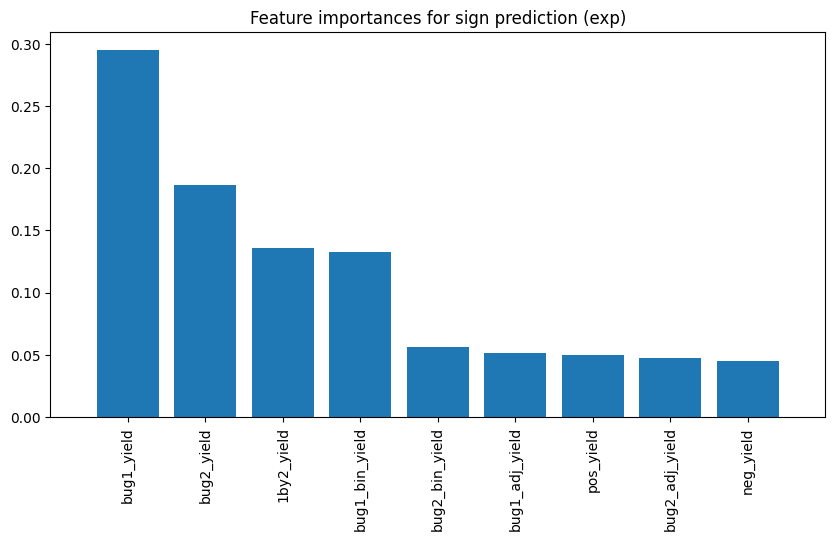

In [31]:
plot_feature_importances(model_sign_yield, X_yield, "Feature importances for sign prediction (exp)")

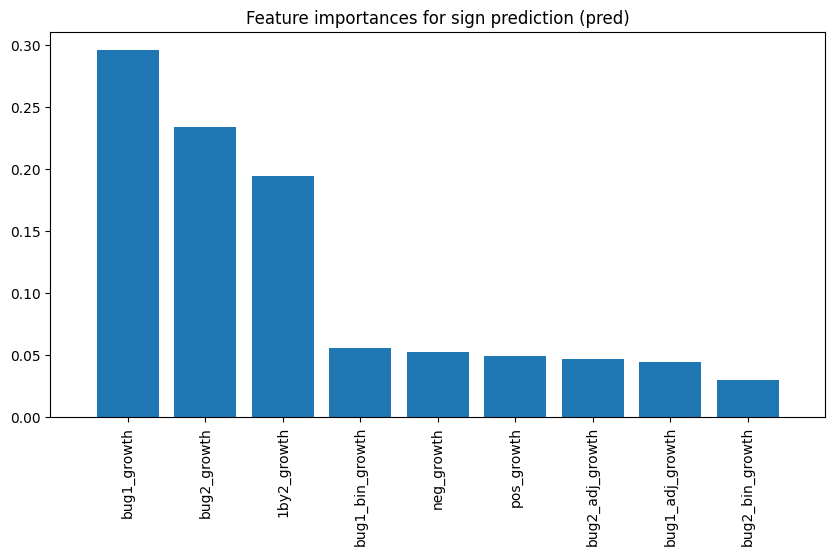

In [32]:
plot_feature_importances(model_sign_growth, X_growth, "Feature importances for sign prediction (pred)")

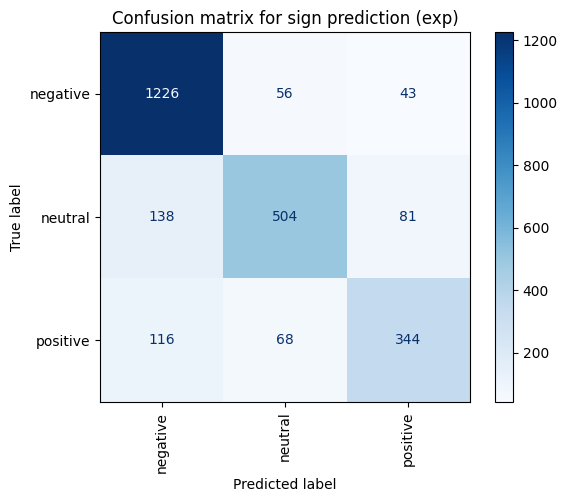

In [33]:
plot_confusion_matrix(y_test_sign_yield, y_pred_sign_yield, "Confusion matrix for sign prediction (exp)")

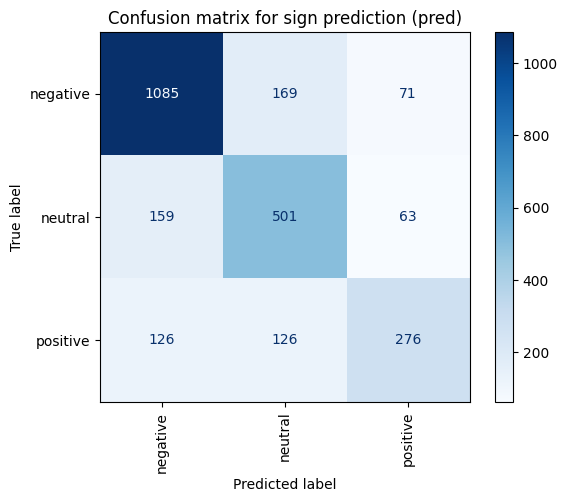

In [34]:
plot_confusion_matrix(y_test_sign_growth, y_pred_sign_growth, "Confusion matrix for sign prediction (pred)")

### Predicting interaction class

(-8.0, 8.0)

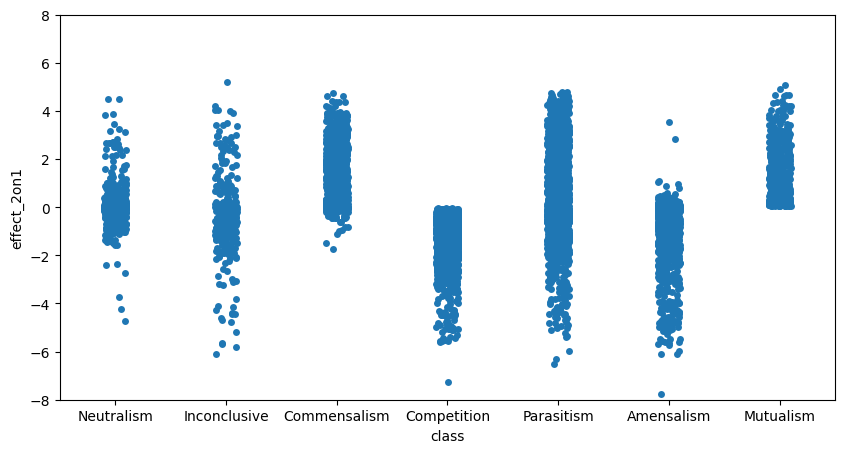

In [35]:
plt.figure(figsize=(10, 5))
sns.stripplot(x=y_class, y=feature_matrix["effect_2on1"])
plt.ylim(-8, 8)

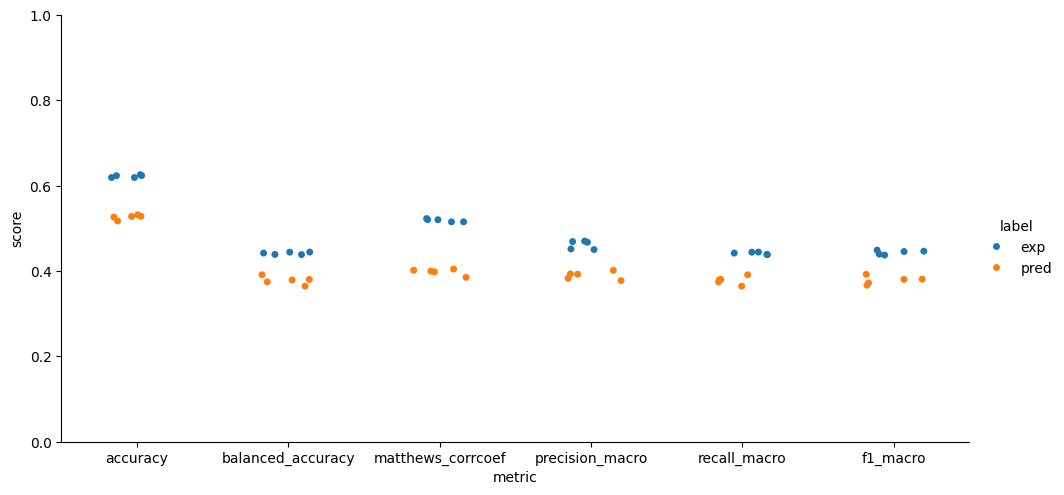

In [36]:
plot_cv(X_yield, X_growth, y_class, scoring)

In [37]:
model_class_yield, y_test_class_yield, y_pred_class_yield = perform_classification(X_yield, y_class)
model_class_growth, y_test_class_growth, y_pred_class_growth = perform_classification(X_growth, y_class)

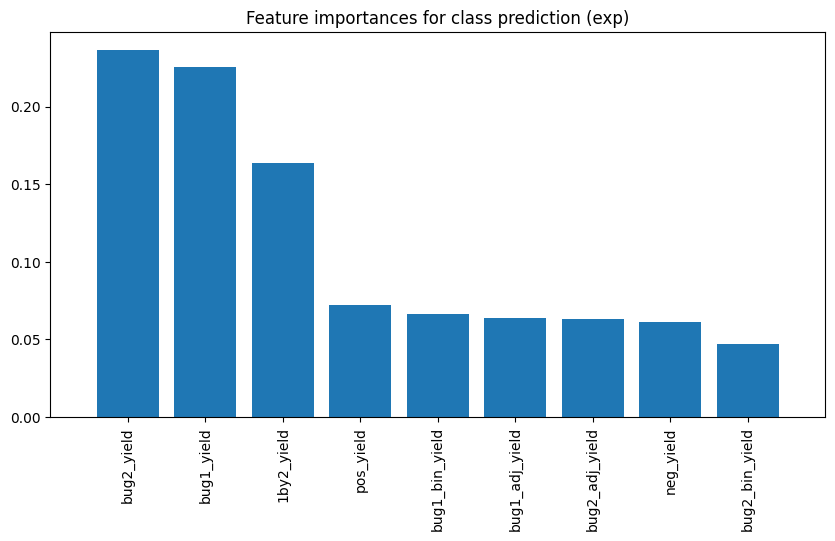

In [38]:
plot_feature_importances(model_class_yield, X_yield, "Feature importances for class prediction (exp)")

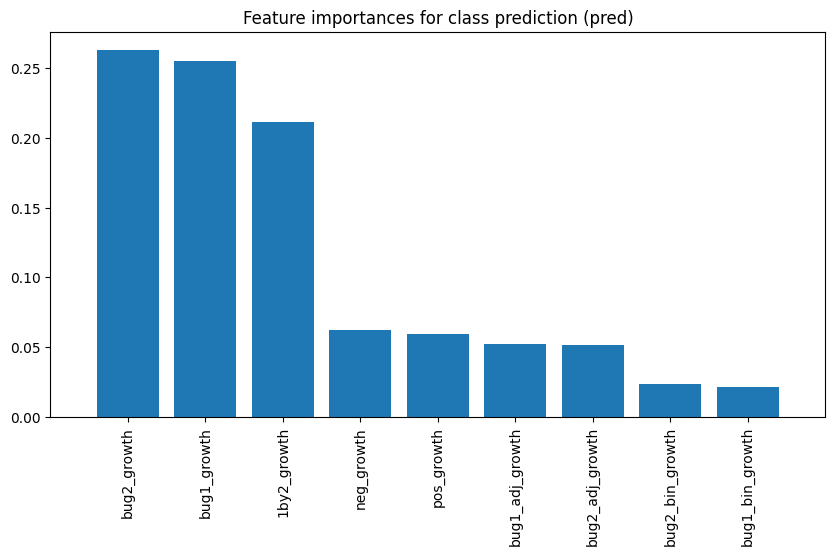

In [39]:
plot_feature_importances(model_class_growth, X_growth, "Feature importances for class prediction (pred)")

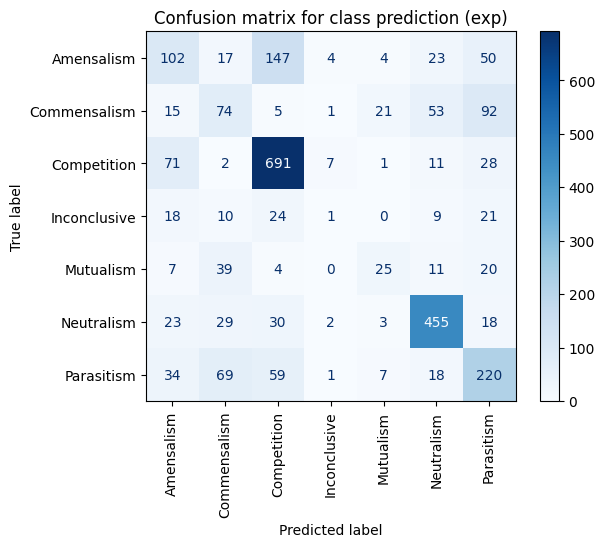

In [40]:
plot_confusion_matrix(y_test_class_yield, y_pred_class_yield, "Confusion matrix for class prediction (exp)")

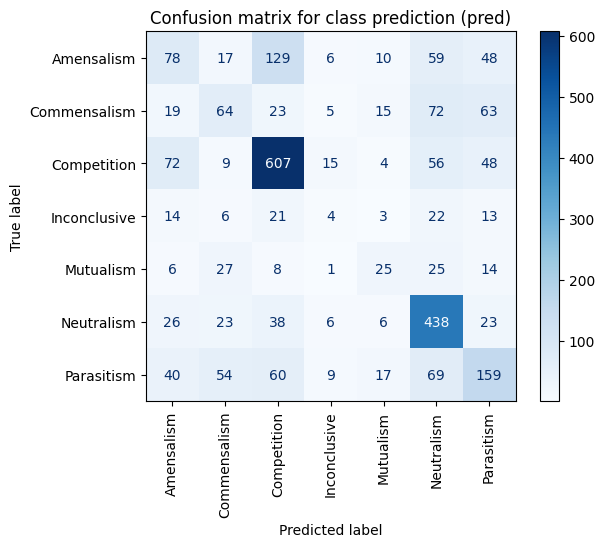

In [41]:
plot_confusion_matrix(y_test_class_growth, y_pred_class_growth, "Confusion matrix for class prediction (pred)")

## Strength prediction

(-8.0, 8.0)

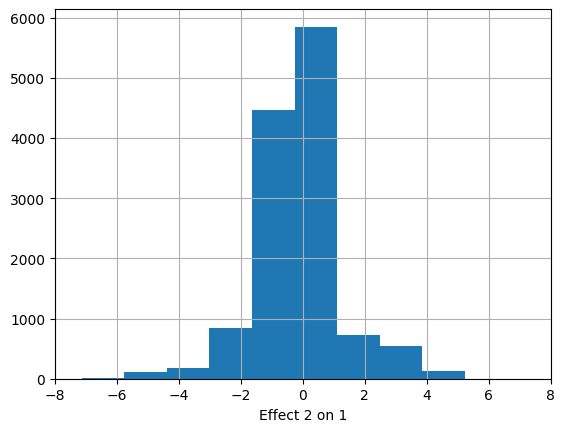

In [42]:
y_strength.hist()
plt.xlabel("Effect 2 on 1")
plt.xlim(-8, 8)

In [43]:
scoring = ["neg_mean_absolute_error", "neg_mean_squared_error", "r2"]

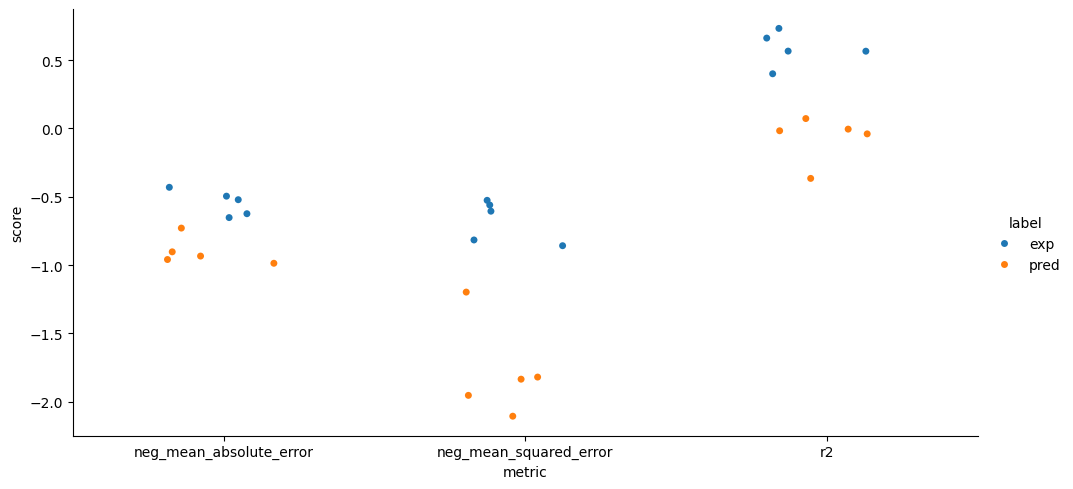

In [44]:
plot_cv(X_yield, X_growth, y_strength, scoring, ctype="regression")

In [45]:
model_strength_yield, y_test_strength_yield, y_pred_strength_yield = perform_classification(X_yield, y_strength, ctype="regression")
model_strength_growth, y_test_strength_growth, y_pred_strength_growth = perform_classification(X_growth, y_strength, ctype="regression")

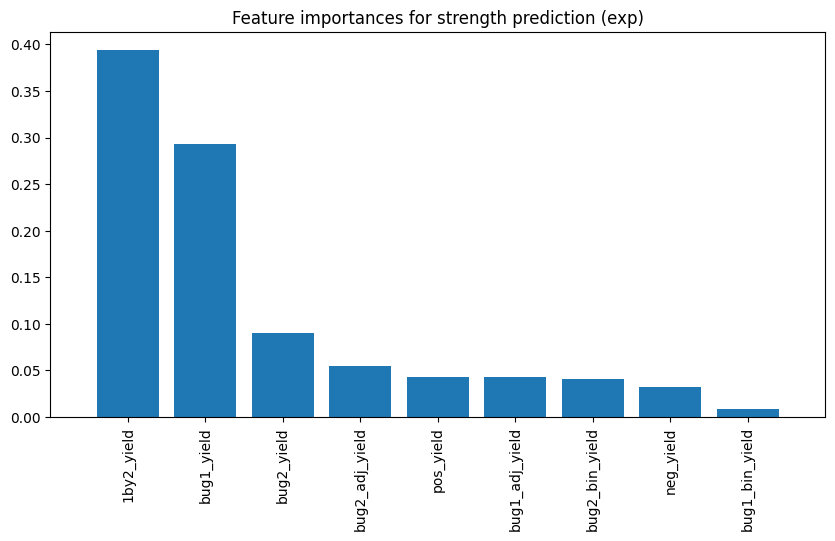

In [46]:
plot_feature_importances(model_strength_yield, X_yield, "Feature importances for strength prediction (exp)")

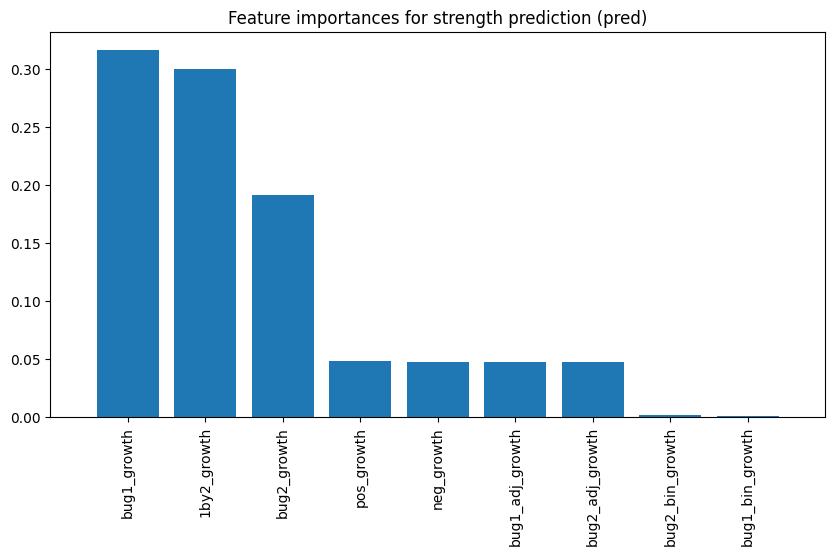

In [47]:
plot_feature_importances(model_strength_growth, X_growth, "Feature importances for strength prediction (pred)")